__**Table of Contents**__
====

>#### [11/2/2018](#1122018)
>#### [11/6/2018](#1162018)
>##### &emsp;[Offset DDO51 calibration function](#zeropoint)  Changes the zero point of DDO51 within a given fits and writes the data to another fits file
>##### &emsp;[Test graph of calibrated fits file](#testgraph)
>#### [11/7/2018](#1172018)
>##### &emsp;[Adding fields and optimizing offset function](#offsetfunctionfields)
>#### [11/10/2018](#11102018)
>#### [11/11/2018](#11112018)
>##### &emsp;[Offset DDO51 calibration function revisited](#calibrationfcn)
>##### &emsp;[Making quality cuts to a fits file](#qualitycuts)  
>##### &emsp;[Making quality cuts using astrometric excess noise and Gaia G](#excessnoiseg)  

<a id='1122018'></a>

11/2/2018
====

>### David has supplied with a new method removing dwarf stars using Gaia.  A cut can be made in the plot of excess astrometric noise and the photometric 'green' band (see below).  These are the cuts that can be made:
#### astrometric_excess_noise < 10^0.5 for G <= 19
##### astrometric_excess_noise < 10^(0.5 + 1.25/4*(G-19)) for G >= 19

<img src="files/aenstargal.png">

>### I will import the calibration data and make these cuts.

In [40]:
# Import libraries and modules
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import csvtofitsmod as cf
%matplotlib inline

cat = Table.read('C:\\Users\shebe\OneDrive\\School\\Graduate\\Research\\Nidever\\Data\\apogeegaia_giants.fits.gz')

In [13]:
#cf.csvtofits('C:\\Users\\shebe\\OneDrive\\School\\Graduate\\Research\\Nidever\\Data\\Temp\\1541185778895A.csv','C:\\Users\\shebe\\OneDrive\\School\\Graduate\\Research\\Nidever\\Data\\apogeegaia_giants_allgaia.fits.gz')

<a id='1162018'></a>

11/6/2018
====

>### I will put off making cuts temporarily.  David gave me three new fits files containing more DDO51 observations by Munn on three nights.  This data set has also been cross-matched with other surveys.  I need to first look for the dwarf locus ("swoosh") in a BP-RP vs. BP-DDO51 color-color plot.

In [172]:
# Import modules
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


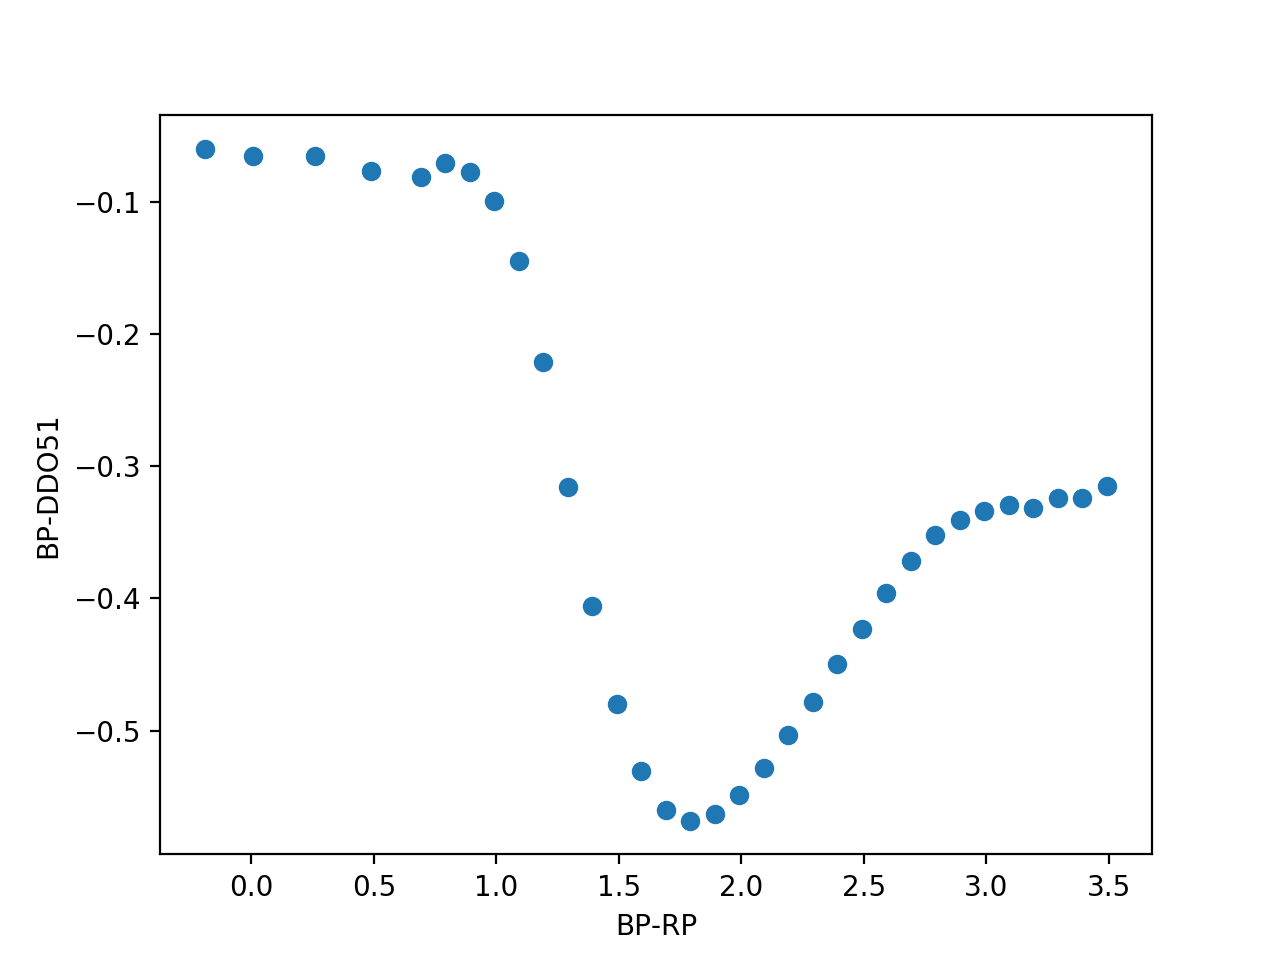

In [173]:
#David sent me what the dwarf swoosh should look like.  This is plotted below.
%matplotlib nbagg
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')

plt.show()

In [174]:
#Loading data from night one
g12 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn\g12d111_xmatch_all.fits.gz')

In [175]:
#Calculate differences between photometric bands
bprp = g12['GAIA_BP']-g12['GAIA_RP']
bpd = g12['GAIA_BP']-g12['DDO51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot = np.zeros(len(g12), dtype=dt)
phot['bprp'] = bprp
phot['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((phot['bprp']<100)&(phot['bpd']<100)&(phot['bprp']!=0)&(phot['bpd']!=0))
phot = phot[good]

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


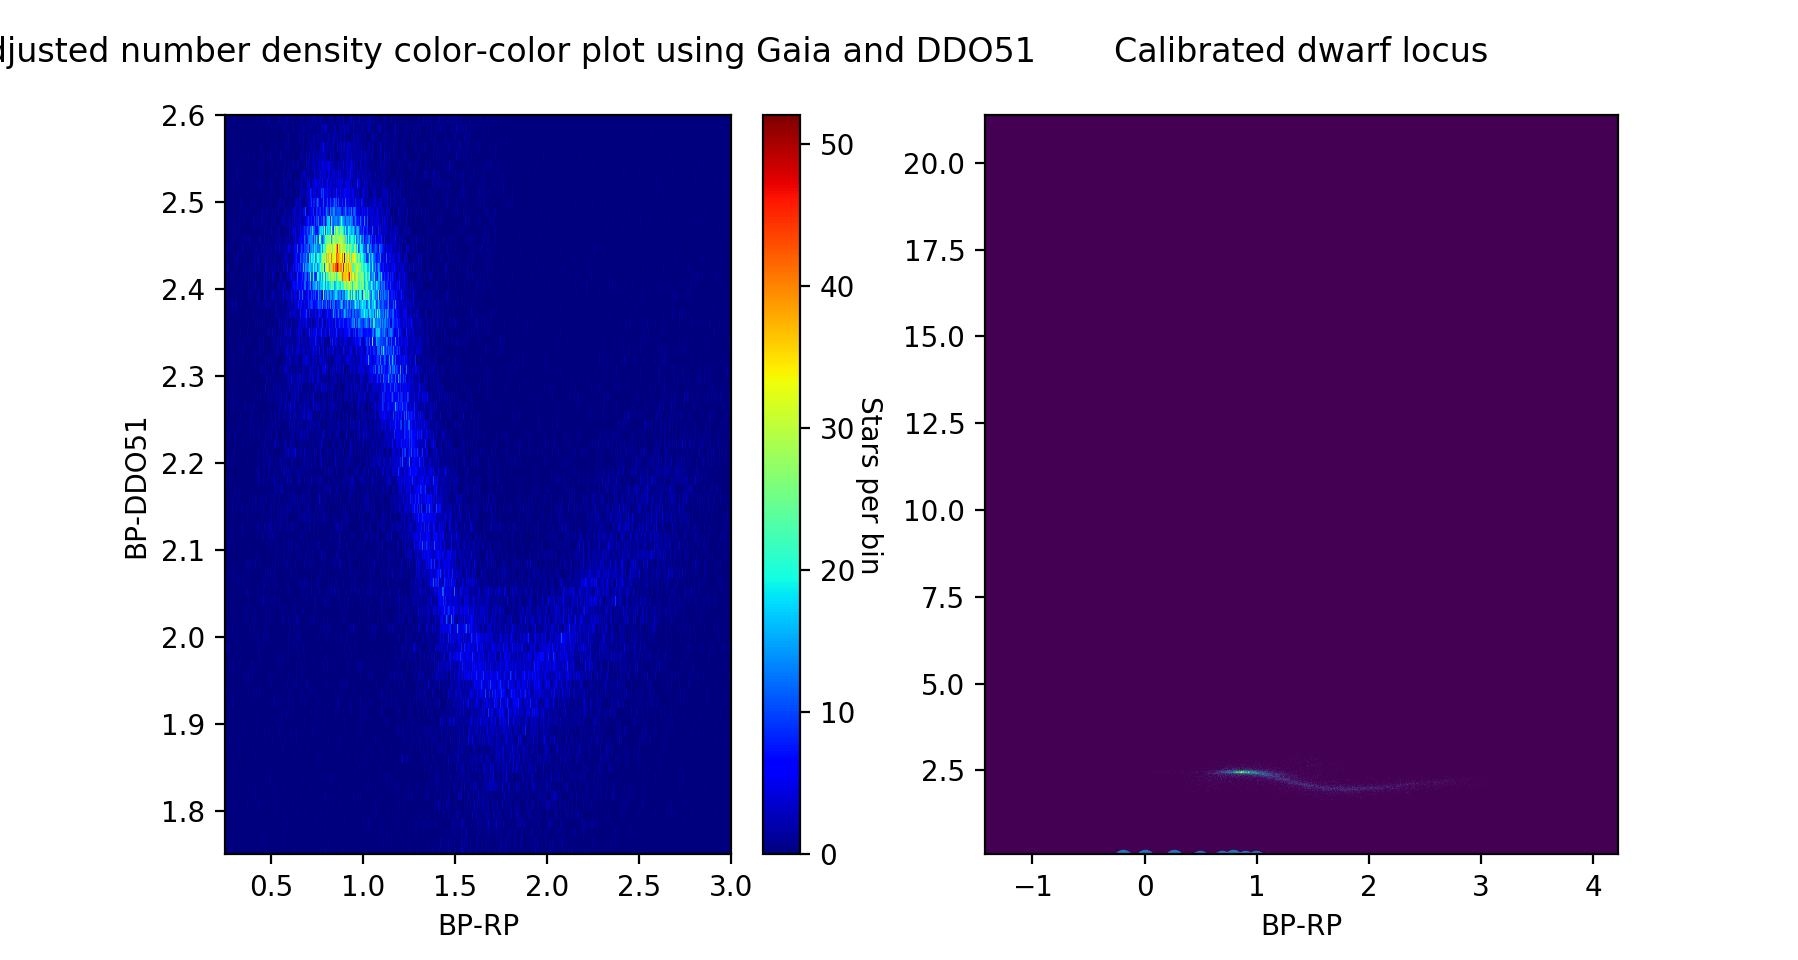

In [176]:
%matplotlib nbagg

x = phot['bprp']
y = phot['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3)
plt.ylim(1.75,2.6)
plt.title('Unadjusted number density color-color plot using Gaia and DDO51', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Calibrated dwarf locus', y=1.05)

plt.show()

In [36]:
print(max(dat['BPD'])-min(dat['BPD']))
2.5-1.9

0.508181


0.6000000000000001

In [37]:
#Adjusting DDO51 zero point
for i in range(len(phot['bpd'])):
    phot['bpd'][i] = phot['bpd'][i]  - 2.5

<IPython.core.display.Javascript object>


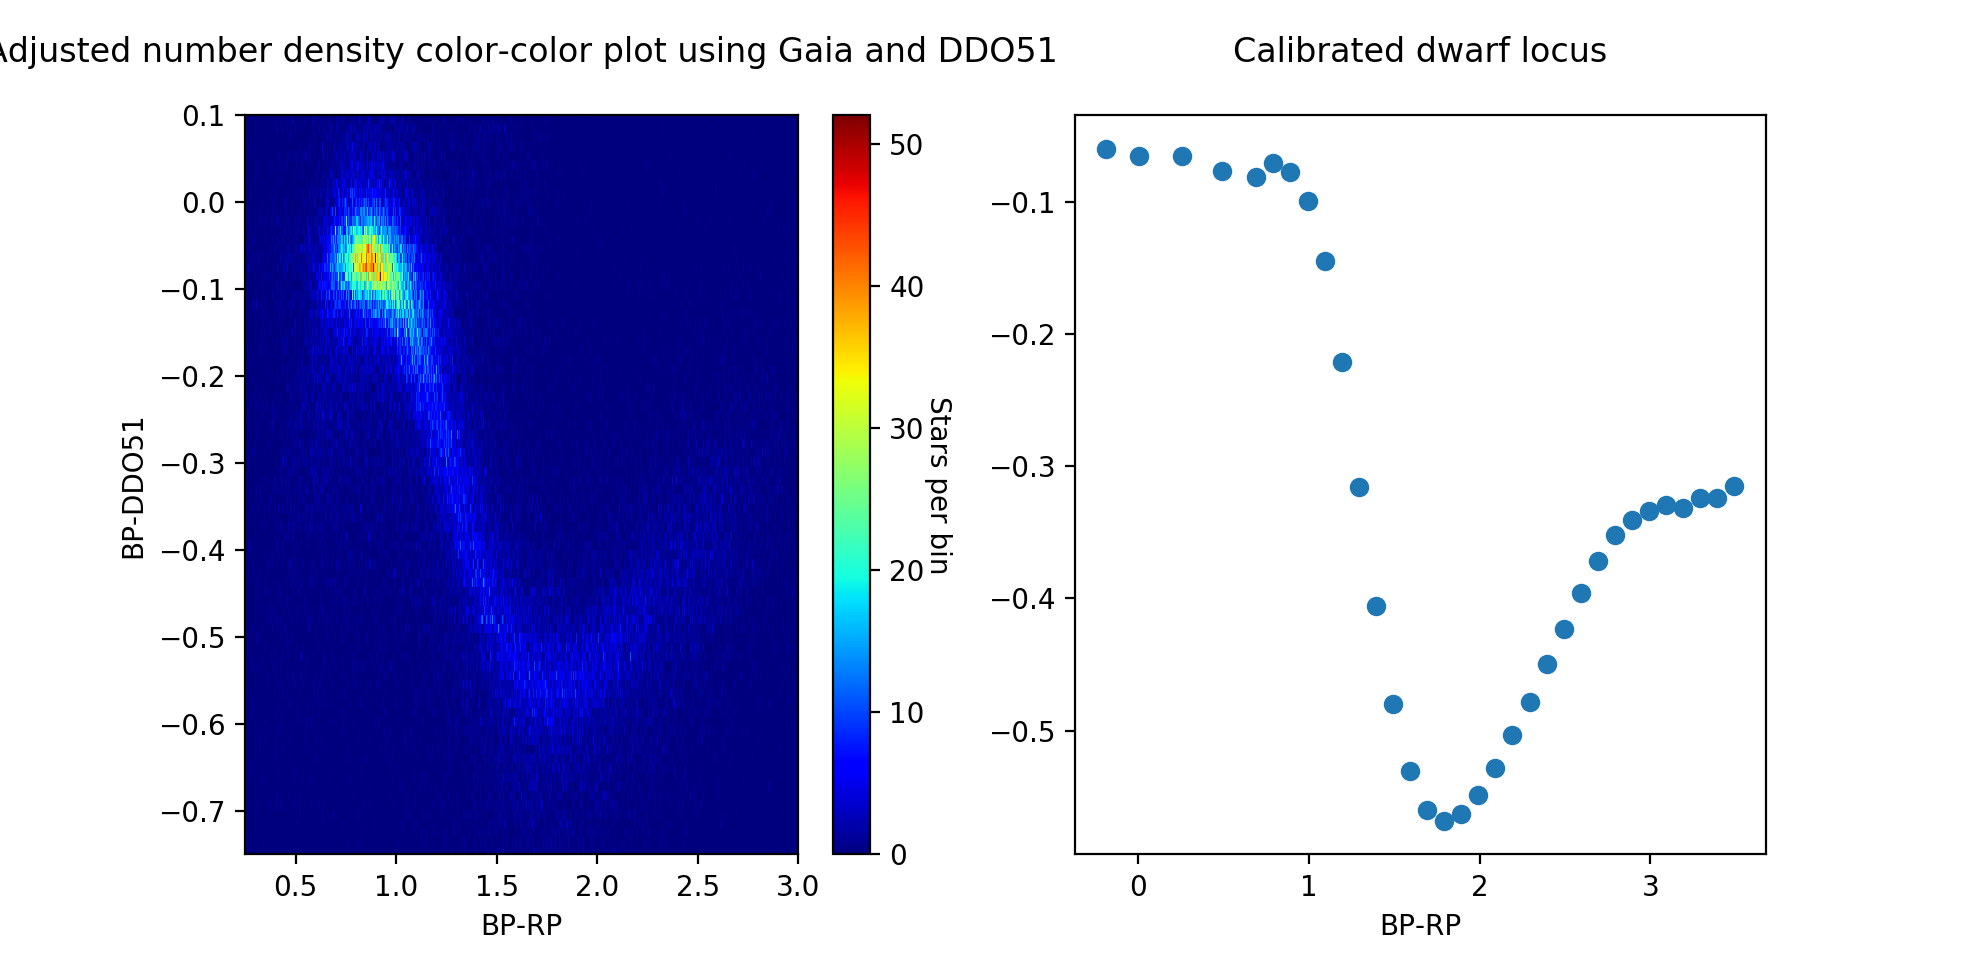

In [38]:
%matplotlib nbagg

x = phot['bprp']
y = phot['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3)
plt.ylim(1.75-2.5,2.6-2.5)
plt.title('Adjusted number density color-color plot using Gaia and DDO51', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Calibrated dwarf locus', y=1.05)

plt.show()

In [43]:
myList = [4, 1, 88, 44, 3]
myNumber = 0
min(myList, key=lambda x:abs(x-myNumber))

1

In [77]:
for i in range(len(phot['bpd'])):
    y = min(dat['BPRP'], key=lambda x:abs(x-phot['bprp'][i]))
    j = np.where(dat['BPRP']==y)
    phot['bpd'][i] = phot['bpd'][i]  - dat['BPD'][j]

In [80]:
#Calculate differences between photometric bands
bprp = g12['GAIA_BP']-g12['GAIA_RP']
bpd = g12['GAIA_BP']-g12['DDO51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
zerop = np.zeros(len(g12), dtype=dt)
zerop['bprp'] = bprp
zerop['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((zerop['bpd']<2.6)&(zerop['bpd']>1.7)&(zerop['bprp']<3)&(zerop['bprp']>0.4))
zerop = zerop[good]

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


In [82]:
for i in range(len(zerop['bpd'])):
    y = min(dat['BPRP'], key=lambda x:abs(x-zerop['bprp'][i]))
    j = np.where(dat['BPRP']==y)
    zerop['bpd'][i] = zerop['bpd'][i]  - dat['BPD'][j]

<IPython.core.display.Javascript object>


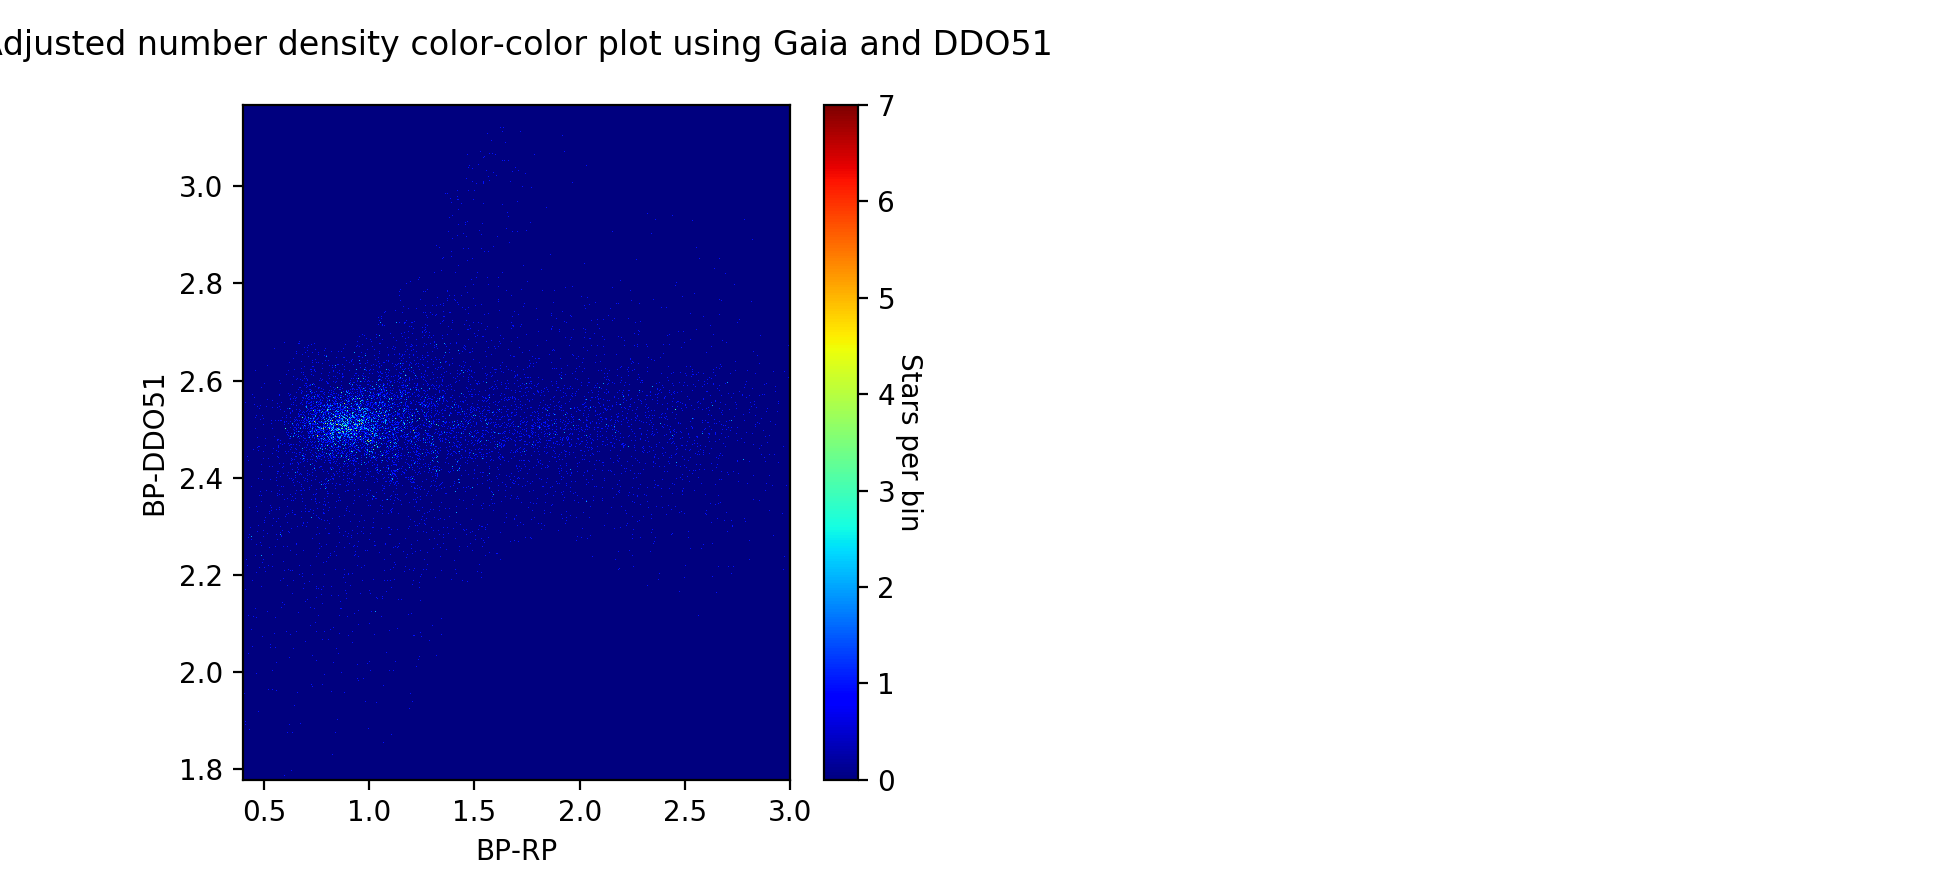

In [83]:
%matplotlib nbagg

x = zerop['bprp']
y = zerop['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.title('Adjusted number density color-color plot using Gaia and DDO51', y=1.05)

plt.show()

In [84]:
np.mean(zerop['bpd'])

2.501296232318444

<a id='zeropoint'></a>

In [124]:
# Putting all of the above together, I can automate the calibration of the zero-point of DDO51 as a function.

def calibr(cat,fin):
    # Import modules
    from astropy.io import fits
    from astropy.table import Table
    import numpy as np

    #Loading data from night one
    z = fits.open(cat)

    #Zero-point data
    #Calculate differences between photometric bands
    bprp = z[1].data['GAIA_BP']-z[1].data['GAIA_RP']
    bpd = z[1].data['GAIA_BP']-z[1].data['DDO51']

    #Create array with desired photometric data
    dt = np.dtype([('bprp',float),('bpd',float)])
    zerop = np.zeros(len(g12), dtype=dt)
    zerop['bprp'] = bprp
    zerop['bpd'] = bpd
    
    #Focus on values near the swoosh
    good = np.where((zerop['bpd']<2.6)&(zerop['bpd']>1.7)&(zerop['bprp']<3)&(zerop['bprp']>0.4))
    zerop = zerop[good]

    #Determine the mean difference between expected BP-DDO51 and the BP-DDO51 in the observation file
    for i in range(len(zerop['bpd'])):
        y = min(dat['BPRP'], key=lambda x:abs(x-zerop['bprp'][i]))
        j = np.where(dat['BPRP']==y)
        zerop['bpd'][i] = zerop['bpd'][i]  - dat['BPD'][j]
    m = np.mean(zerop['bpd'])
    
    #Adjusting DDO51 zero point
    for i in range(len(z[1].data['DDO51'])):
        z[1].data['DDO51'][i] = z[1].data['DDO51'][i] + m
    
    z.writeto(fin)

In [125]:
#Testing
calibr(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn\g12d111_xmatch_all.fits.gz',r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Test Data\testing.fits')

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater


In [126]:
test = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Test Data\testing.fits')

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


<IPython.core.display.Javascript object>


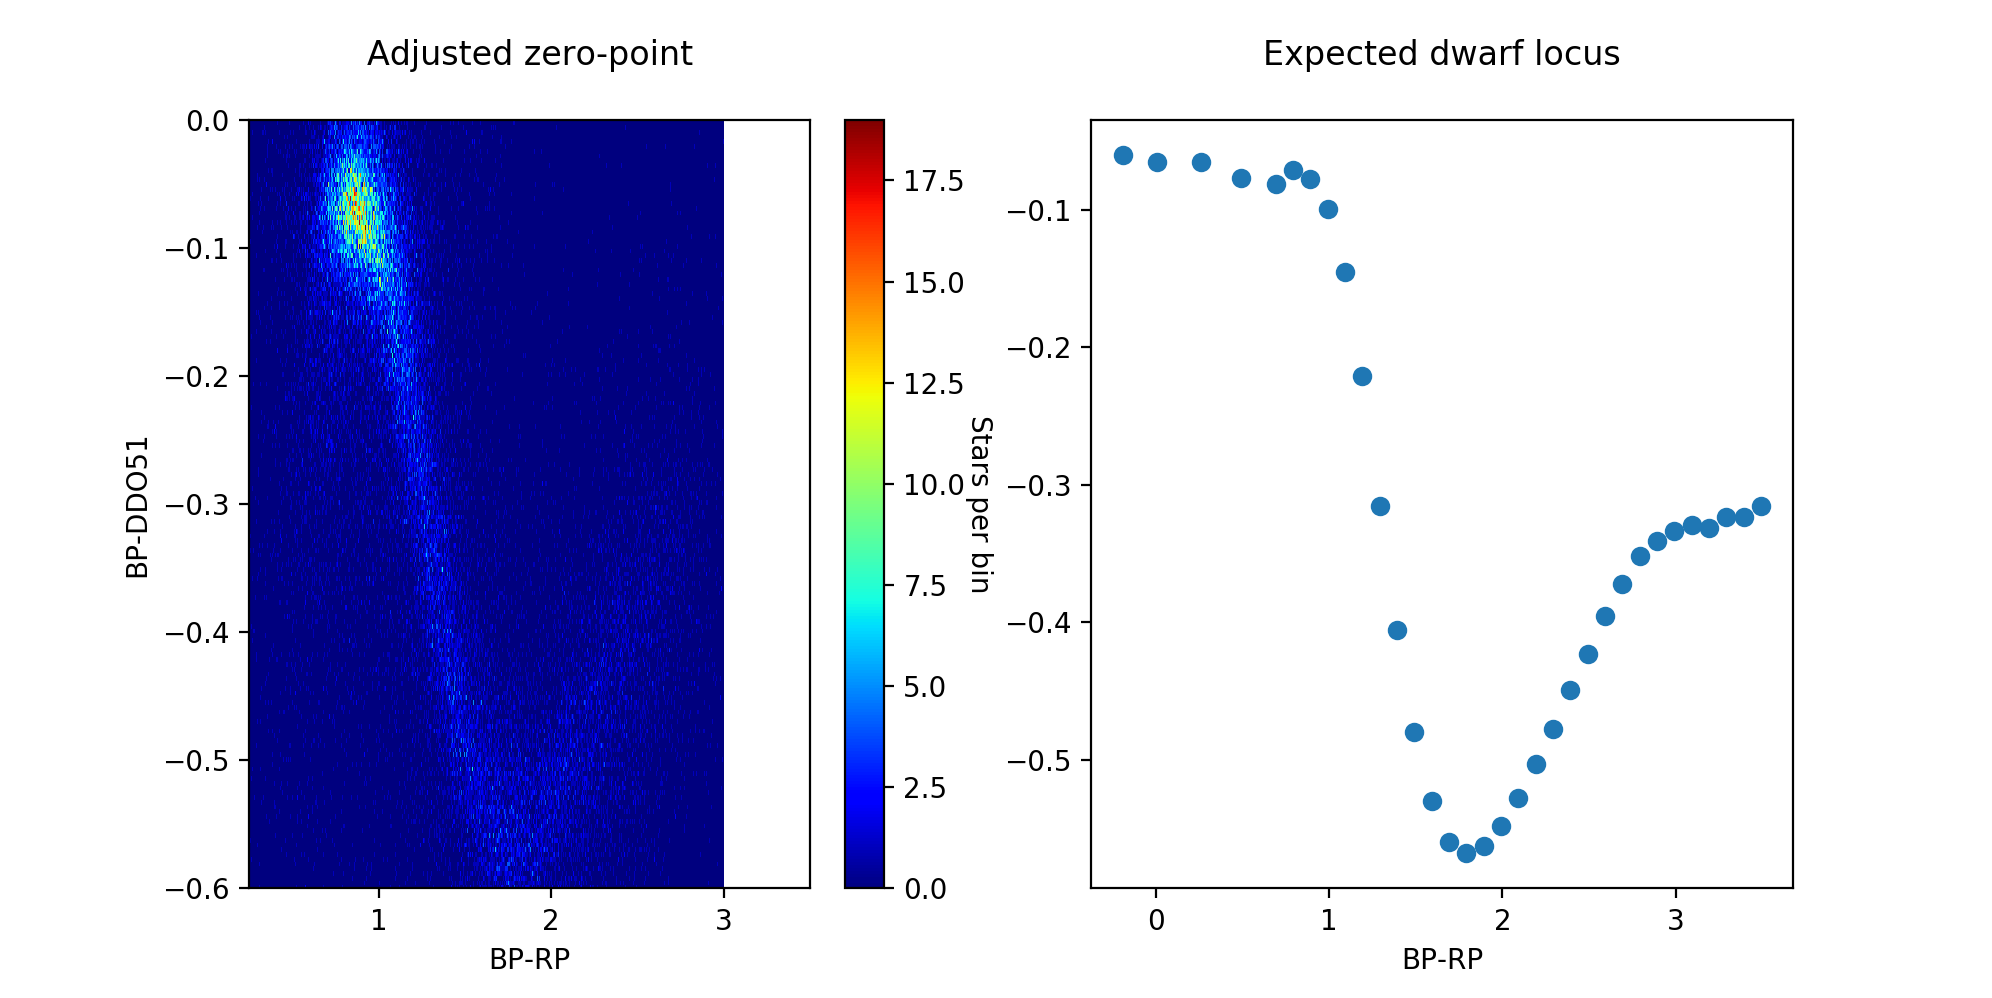

In [131]:
%matplotlib nbagg

#Calculate differences between photometric bands
bprp = test['GAIA_BP']-test['GAIA_RP']
bpd = test['GAIA_BP']-test['DDO51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot = np.zeros(len(g12), dtype=dt)
phot['bprp'] = bprp
phot['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((phot['bprp']<3)&(phot['bpd']<5)&(phot['bprp']!=0)&(phot['bpd']!=0))
phot = phot[good]

x = phot['bprp']
y = phot['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3.5)
plt.ylim(-0.6,0)
plt.title('Adjusted zero-point', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Expected dwarf locus', y=1.05)

plt.show()

<a id='testgraph'></a>

>### Above I demonstrate that my new function can calibrate the DDO51 photometry as desired and generate a new fits file.

<a id='1172018'></a>

11/7/2018
====

In [8]:
g12['FILE']

g12d111.0121
g12d111.0121
g12d111.0121
g12d111.0121
g12d111.0121
g12d111.0121
g12d111.0121
g12d111.0121
g12d111.0121
g12d111.0121
g12d111.0121


>### I will check the above fields (last four digits) for quality by similar methods to those above.

In [7]:
len(np.unique(g12['FILE']))

117

>### But first, I will try to interpolate between points in the expected dwarf locus data.  Below I test numpy's interpolate function.

In [16]:
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')
testpoints = [0,1,1.55]
np.interp(testpoints,dat['BPRP'],dat['BPD'])

array([-0.06529916, -0.10346479, -0.50917255])

<IPython.core.display.Javascript object>


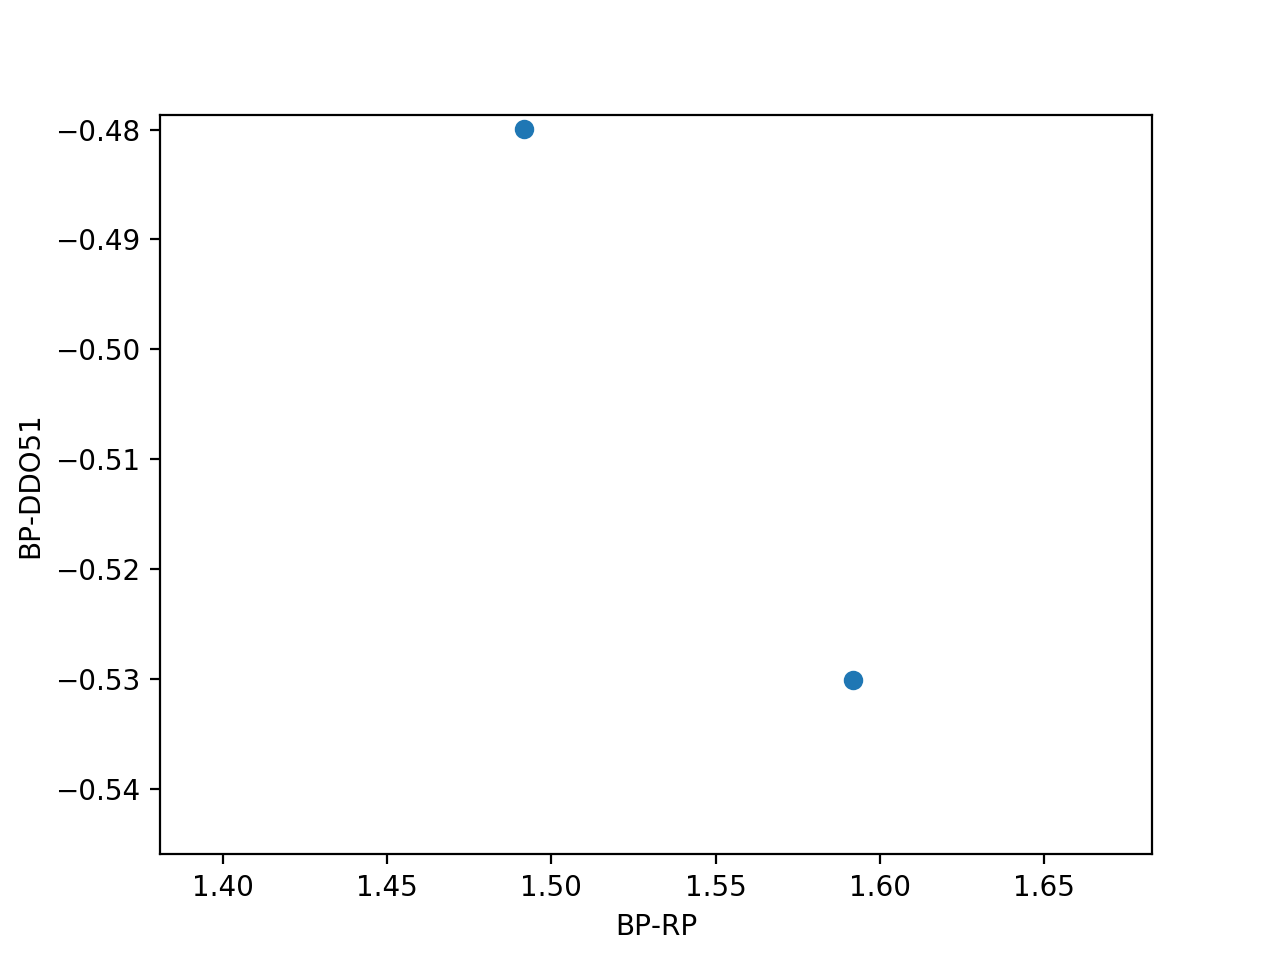

In [15]:
%matplotlib nbagg
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')

plt.show()

<a id='offsetfunctionfields'></a>

>###  The function has the desired result.  Now I can incorporate it into my function.  These are the overall modifications I will make to the function:
>#### 1) Use np.interp rather than finding the nearest BP-RP value from the dwarf locus data.
>#### 2) Adjust DDO51 vectorially rather than entry by entry.
>#### 3) Create an array containing the mean offset by field

In [ ]:
#This function should return a structured array with the mean offset for each field.

def calibr(cat):
    # Import modules
    from astropy.io import fits
    from astropy.table import Table
    import numpy as np

    #Loading data from night one
    z = fits.open(cat)

    #Zero-point data
    #Calculate differences between photometric bands
    bprp = z[1].data['GAIA_BP']-z[1].data['GAIA_RP']
    bpd = z[1].data['GAIA_BP']-z[1].data['DDO51']

    #Create array with desired photometric data
    dt = np.dtype([('bprp',float),('bpd',float),('file',float)])
    zerop = np.zeros(len(z[1]), dtype=dt)
    zerop['bprp'] = bprp
    zerop['bpd'] = bpd
    zerop['file'] = z[1].data['FILE']
    
    #Focus on values near the dwarf locus
    good = np.where((zerop['bpd']<2.6)&(zerop['bpd']>1.7)&(zerop['bprp']<3)&(zerop['bprp']>0.4))
    zerop = zerop[good]

    dt = np.dtype([('field',float),('mean',float)])
    fieldmean = np.zeros(len(np.unique(z[1]['FILE'])), dtype=dt)
    
    #Determine the mean difference between expected BP-DDO51 and the BP-DDO51 in the observation file
    photint = np.interp(phot['bprp'],dat['BPRP'],dat['BPD'])
    diff = zerop['bpd']  - photint
    m = np.mean(diff)



In [21]:
np.unique(g12['FILE'])

g12d111.0121
g12d111.0122
g12d111.0123
g12d111.0124
g12d111.0125
g12d111.0126
g12d111.0131
g12d111.0132
g12d111.0133
g12d111.0134
g12d111.0135


In [63]:
 #Loading data from one night
z = fits.open(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn\g12d111_xmatch_all.fits.gz')
dt = np.dtype([('field',str),('mean',float)])
uni = np.unique(z[1].data['FILE'])
fieldmean = np.zeros(len(uni),dtype=dt)
fieldmean['field'] = uni

In [64]:
fieldmean['field']

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
      dtype='<U0')

<a id='11102018'></a>

11/10/2018
====

>###  I continue working on the new function below.  I need to determine why the 'field' strings will not load into the array.

In [3]:
#Import modules
from astropy.io import fits
import numpy as np

#Loading data from one night
z = fits.open(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn\g12d111_xmatch_all.fits.gz')

#Create a new fits table with a field column and mean column
uni = np.unique(z[1].data['FILE'])
field = np.array(uni)
dt = np.dtype([('mean',float)])
mean = np.zeros(len(uni))
col1 = fits.Column(name='field', format='A15', array=field)
col2 = fits.Column(name='mean', format='J', unit='DN', array=mean)
coldefs = fits.ColDefs([col1, col2])
hdu = fits.BinTableHDU.from_columns(coldefs)
coldefs

ColDefs(
    name = 'field'; format = '15A'
    name = 'mean'; format = 'J'; unit = 'DN'
)

In [133]:
hdu.data['field']

chararray(['g12d111.0121', 'g12d111.0122', 'g12d111.0123', 'g12d111.0124',
           'g12d111.0125', 'g12d111.0126', 'g12d111.0131', 'g12d111.0132',
           'g12d111.0133', 'g12d111.0134', 'g12d111.0135', 'g12d111.0136',
           'g12d111.0141', 'g12d111.0142', 'g12d111.0143', 'g12d111.0144',
           'g12d111.0145', 'g12d111.0146', 'g12d111.0151', 'g12d111.0152',
           'g12d111.0153', 'g12d111.0154', 'g12d111.0155', 'g12d111.0156',
           'g12d111.0161', 'g12d111.0162', 'g12d111.0163', 'g12d111.0164',
           'g12d111.0165', 'g12d111.0166', 'g12d111.0181', 'g12d111.0182',
           'g12d111.0183', 'g12d111.0184', 'g12d111.0185', 'g12d111.0186',
           'g12d111.0191', 'g12d111.0192', 'g12d111.0193', 'g12d111.0194',
           'g12d111.0195', 'g12d111.0196', 'g12d111.0201', 'g12d111.0202',
           'g12d111.0203', 'g12d111.0204', 'g12d111.0205', 'g12d111.0206',
           'g12d111.0211', 'g12d111.0212', 'g12d111.0213', 'g12d111.0214',
           'g12d111.0215'

>### The fits table method above seems to work.  I will use it in the new function and append the mean value of the mean offset per field.

In [18]:
#This function should return a structured array with the mean offset for each field.

def fieldoff(cat):
    # Import modules
    from astropy.io import fits
    from astropy.table import Table
    import numpy as np

    #Loading data from night one
    z = fits.open(cat)
    
    #loading dwarf locus data
    dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')
    
    #Create a new fits table with a field column and mean column
    uni = np.unique(z[1].data['FILE'])
    field = np.array(uni)
    dt = np.dtype([('mean',float)])
    mean = np.zeros(len(uni))
    col1 = fits.Column(name='field', format='A15', array=field)
    col2 = fits.Column(name='mean', format='E10', array=mean)
    coldefs = fits.ColDefs([col1, col2])
    hdu = fits.BinTableHDU.from_columns(coldefs)
    
    #Remove nans from data
    ind = np.where((~np.isnan(z[1].data['GAIA_BP']))&
                   (~np.isnan(z[1].data['GAIA_RP']))&
                   (~np.isnan(z[1].data['DDO51'])))
    z = z[1].data[ind]
        
    for i in hdu.data['field']:
        
        #Indices
        ind = np.where(z['FILE']==i)
        
        #Subset in the same field
        sub = z[ind]
        
        #Zero-point data
        #Calculate differences between photometric bands
        bprp = sub['GAIA_BP']-sub['GAIA_RP']
        bpd = sub['GAIA_BP']-sub['DDO51']
        
        #Create array with desired photometric data
        dt = np.dtype([('bprp',float),('bpd',float)])
        zerop = np.zeros(len(sub), dtype=dt)
        zerop['bprp'] = bprp
        zerop['bpd'] = bpd
        
        #Focus on values near the dwarf locus
        ind = np.where((zerop['bprp']<3)&(zerop['bpd']<3))
        zerop = zerop[ind]
        hist, xedges, yedges = np.histogram2d(zerop['bprp'],zerop['bpd'], [50,50])
        ind = np.where(hist == hist.max())
        #Find the location of highest density in the locus
        x0 = xedges[ind[0]][0]
        y0 = xedges[ind[1]][0]
        good = np.where((zerop['bpd']<y0+0.15)&(zerop['bpd']>y0-0.68)&(zerop['bprp']<x0+2.17)&(zerop['bprp']>x0-0.574))
        zerop = zerop[good]
        
        #Determine the mean difference between expected BP-DDO51 and the BP-DDO51 in the observation file
        photint = np.interp(zerop['bprp'],dat['BPRP'],dat['BPD'])
        diff = zerop['bpd']  - photint
        m = np.mean(diff)
        ind = np.where(hdu.data['field']==i)
        hdu.data['mean'][ind] = m
    
    return hdu

In [19]:
test = fieldoff(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn\g12d111_xmatch_all.fits.gz')

C:\Users\shebe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\shebe\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
test.data

FITS_rec([('g12d111.0121',  2.33721256), ('g12d111.0122',  2.16146946),
          ('g12d111.0123',  2.43319631), ('g12d111.0124',  2.44578934),
          ('g12d111.0125',  2.36311412), ('g12d111.0126',  2.30464745),
          ('g12d111.0131',  2.39357638), ('g12d111.0132',  2.3334434 ),
          ('g12d111.0133',  2.32881498), ('g12d111.0134',  2.42912483),
          ('g12d111.0135',  2.16687775), ('g12d111.0136',  2.33220649),
          ('g12d111.0141',  2.39421868), ('g12d111.0142',  2.35973263),
          ('g12d111.0143',  2.12768531), ('g12d111.0144',  2.41200352),
          ('g12d111.0145',  2.28705978), ('g12d111.0146',  2.25443149),
          ('g12d111.0151',  2.38204885), ('g12d111.0152',  2.39651966),
          ('g12d111.0153',  2.3873961 ), ('g12d111.0154',  2.46880651),
          ('g12d111.0155',         nan), ('g12d111.0156',  2.41576362),
          ('g12d111.0161',  2.27038622), ('g12d111.0162',  2.09063435),
          ('g12d111.0163',  2.43892264), ('g12d111.0164',  2.380

<IPython.core.display.Javascript object>


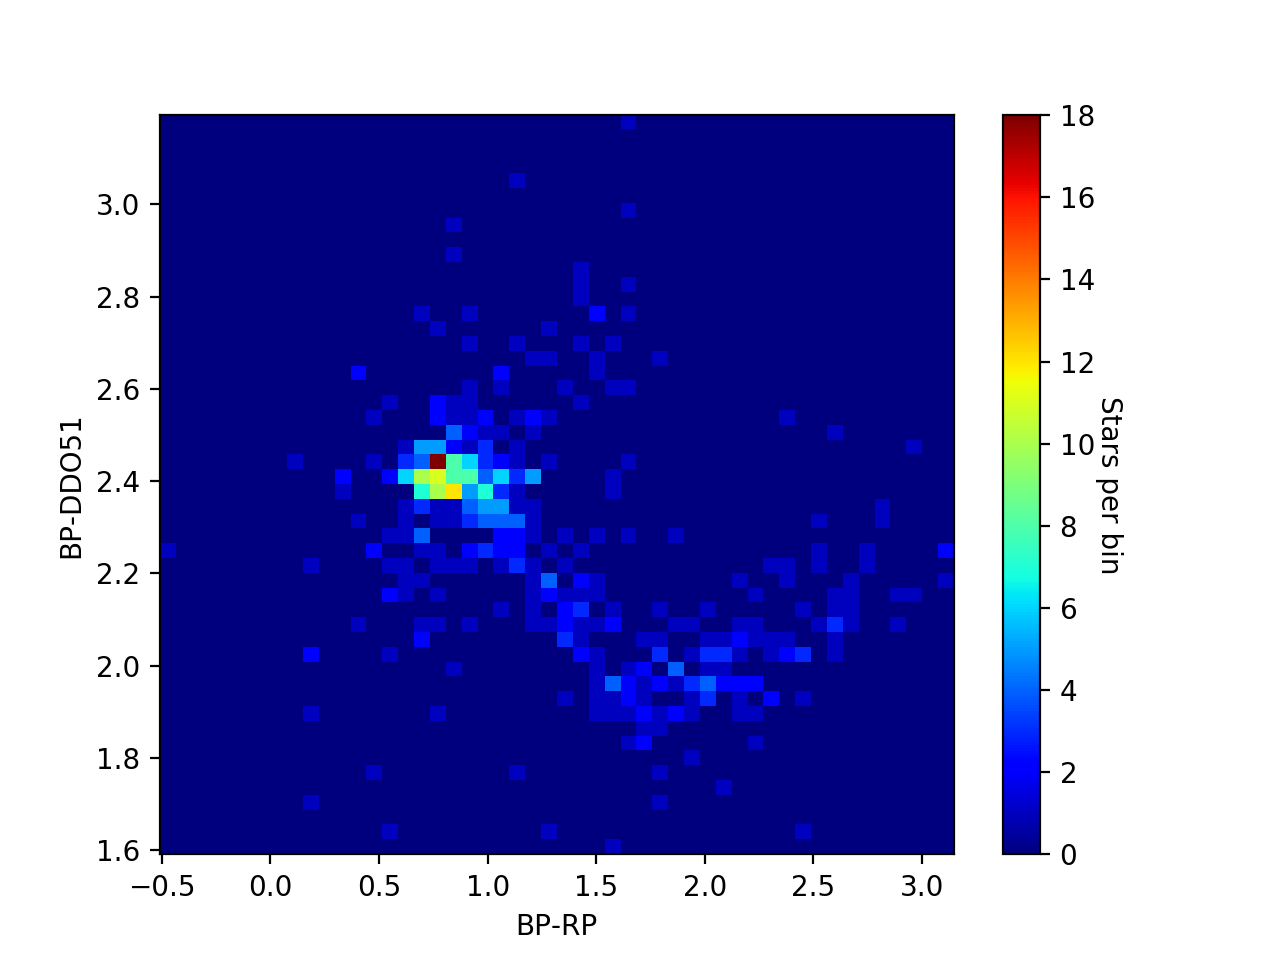

In [28]:
%matplotlib nbagg

from astropy.table import Table


g12 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn\g12d111_xmatch_all.fits.gz')

#Remove nans from data
ind = np.where((~np.isnan(g12['GAIA_BP']))&
               (~np.isnan(g12['GAIA_RP']))&
               (~np.isnan(g12['DDO51'])))
g12 = g12[ind]

#Filter down to single field
ind = np.where(g12['FILE']=='g12d111.0214')
g12 = g12[ind]

#Calculate differences between photometric bands
bprp = g12['GAIA_BP']-g12['GAIA_RP']
bpd = g12['GAIA_BP']-g12['DDO51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot = np.zeros(len(g12), dtype=dt)
phot['bprp'] = bprp
phot['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
ind = np.where((phot['bprp']<20)&(phot['bpd']<20))
phot = phot[ind]

x = phot['bprp']
y = phot['bpd']

plt.hist2d(x, y, (50, 50), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
#plt.xlim(0.25,3)
#plt.ylim(1.75,2.6)
#plt.title('Unadjusted number density color-color plot using Gaia and DDO51', y=1.05)

plt.show()

<IPython.core.display.Javascript object>


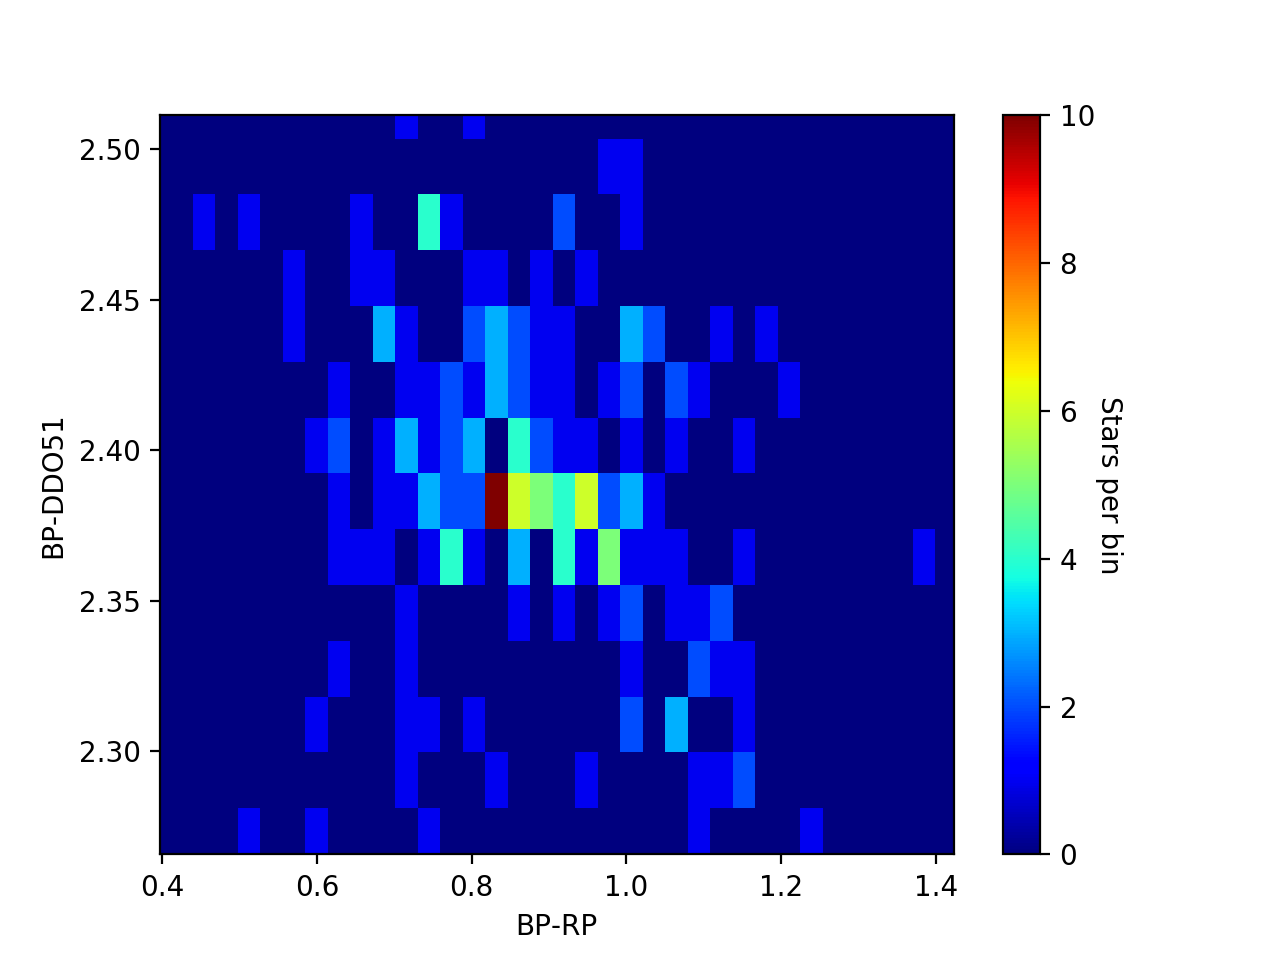

(0.81728794097900392, 2.3735737800598145)

In [6]:
%matplotlib nbagg
# Import modules
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

g12 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn\g12d111_xmatch_all.fits.gz')

#Remove nans from data
ind = np.where((~np.isnan(g12['GAIA_BP']))&
               (~np.isnan(g12['GAIA_RP']))&
               (~np.isnan(g12['DDO51'])))
g12 = g12[ind]

#Filter down to single field
ind = np.where(g12['FILE']=='g12d111.0185')
g12 = g12[ind]

#Calculate differences between photometric bands
bprp = g12['GAIA_BP']-g12['GAIA_RP']
bpd = g12['GAIA_BP']-g12['DDO51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot = np.zeros(len(g12), dtype=dt)
phot['bprp'] = bprp
phot['bpd'] = bpd

#Focus on the swoosh
ind = np.where((phot['bprp']<20)&(phot['bpd']<20))
phot = phot[ind]

x = phot['bprp']
y = phot['bpd']

plt.hist2d(x, y, (100, 100), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
#plt.xlim(0.25,3)
#plt.ylim(1.75,2.6)
#plt.title('Unadjusted number density color-color plot using Gaia and DDO51', y=1.05)

#plt.show()

hist, xedges, yedges = np.histogram2d(phot['bprp'],phot['bpd'], [100,100])
hist.max()
ind = np.where(hist == hist.max())
#Find the location of highest density in the locus
x0 = xedges[ind[0]][0]
y0 = yedges[ind[1]][0]
(x0,y0)

<a id='11112018'></a>

11/11/2018
====

>### The above work has devolved into chaos.  I have decided to distill my results in the journal by working in iPython, then putting successful results in the the notebook afterwards.
>
>###  Going forward, I am going to find a better method to find the part of the locus with the highest number density.

In [2]:
def fieldoff(cat):
    # Import modules
    from astropy.io import fits
    from astropy.table import Table
    import numpy as np

    #Loading data from a single night\
    z = fits.open(cat)

    #Loading dwarf locus data
    dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

    #Create a new fits table with field and mean columns
    uni = np.unique(z[1].data['FILE'])
    field = np.array(uni)
    dt = np.dtype([('mean',float)])
    mean = np.zeros(len(uni))
    col1 = fits.Column(name='field', format='A15', array=field)
    col2 = fits.Column(name='mean', format='E10', array=mean)
    coldefs = fits.ColDefs([col1,col2])
    hdu = fits.BinTableHDU.from_columns(coldefs)

    #Remove all nans from photometry
    ind = np.where((~np.isnan(z[1].data['GAIA_BP']))&(~np.isnan(z[1].data['GAIA_RP']))&(~np.isnan(z[1].data['DDO51'])))
    z = z[1].data[ind]
    
    for i in hdu.data['field']:

        #Indices
        ind = np.where(z['FILE']==i)

        #Subset of data points in the same field
        sub = z[ind]

        #Build an array of "zero-point" data to determine offset
        #Calculate photometric differences
        bprp = sub['GAIA_BP'] - sub['GAIA_RP']
        bpd = sub['GAIA_BP'] - sub['DDO51']

        #Create the array that contains all the photometric data
        dt = np.dtype([('bprp',float),('bpd',float)])
        zerop = np.zeros(len(sub), dtype=dt)
        zerop['bprp'] = bprp
        zerop['bpd'] = bpd

        #Focus on values near the dwarf locus
        ind = np.where(zerop['bpd']<5)
        zerop = zerop[ind]
        hist, xedges, yedges = np.histogram2d(zerop['bprp'], zerop['bpd'], [50,50])
        ind = np.where(hist == hist.max())
        #Find the location of highest density in the locus
        x0 = xedges[ind[0]][0]
        y0 = yedges[ind[1]][0]
        good = np.where((zerop['bpd']<y0+0.15)&(zerop['bpd']>y0-0.68)&(zerop['bprp']<x0+2.17)&(zerop['bprp']>x0-0.574))

        #Determing the mean difference between expected and observed BP-DDO51
        photint = np.interp(zerop['bprp'],dat['BPRP'],dat['BPD'])
        diff = zerop['bpd'] - photint
        m = np.mean(diff)
        ind = np.where(hdu.data['field'] == i)
        hdu.data['mean'][ind] = m
        
    return hdu

>### There was a single typo in the field offset function above.  I typed xedge instead of yedge in the highest density location section.  Function now works as expected.

In [3]:
test = fieldoff(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn\g12d111_xmatch_all.fits.gz')

C:\Users\shebe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\shebe\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
print("Offset range: {0}".format([min(test.data['mean']),max(test.data['mean'])]))

Offset range: [2.410579, 2.5855951]


>### Above we see that our offset is in a range of 2.41 and 2.59 dex.
>
>### Below I have vectorized the calibration function.  I will also test several quality cuts after I calibrate DDO51 in the fits file.

<a id='calibrationfcn'></a>

In [2]:
def calibr(cat):
    # Import modules
    from astropy.io import fits
    import numpy as np
    from astropy.table import Table

    #Loading data from night one
    z = fits.open(cat)
    
    #Loading dwarf locus data
    dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')
    
    #Remove all nans from photometry
    ind = np.where((~np.isnan(z[1].data['GAIA_BP']))&(~np.isnan(z[1].data['GAIA_RP']))&(~np.isnan(z[1].data['DDO51'])))
    z = z[1].data[ind]

    #Zero-point data
    #Calculate differences between photometric bands
    bprp = z['GAIA_BP']-z['GAIA_RP']
    bpd = z['GAIA_BP']-z['DDO51']

    #Create array with desired photometric data
    dt = np.dtype([('bprp',float),('bpd',float)])
    zerop = np.zeros(len(z['FILE']), dtype=dt)
    zerop['bprp'] = bprp
    zerop['bpd'] = bpd

    #Focus on values near the dwarf locus
    ind = np.where(zerop['bpd']<5)
    zerop = zerop[ind]
    hist, xedges, yedges = np.histogram2d(zerop['bprp'], zerop['bpd'], [50,50])
    ind = np.where(hist == hist.max())
    #Find the location of highest density in the locus
    x0 = xedges[ind[0]][0]
    y0 = yedges[ind[1]][0]
    good = np.where((zerop['bpd']<y0+0.15)&(zerop['bpd']>y0-0.68)&(zerop['bprp']<x0+2.17)&(zerop['bprp']>x0-0.574))

    #Determine the mean difference between expected BP-DDO51 and the BP-DDO51 in the observation file
    photint = np.interp(zerop['bprp'],dat['BPRP'],dat['BPD'])
    diff = zerop['bpd'] - photint
    m = np.mean(diff)

    #Adjusting DDO51 zero point
    mvec = [m]*len(z['DDO51'])
    z['DDO51'] += mvec

    return(z)

In [81]:
test = calibr(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn\g12d111_xmatch_all.fits.gz')

<IPython.core.display.Javascript object>


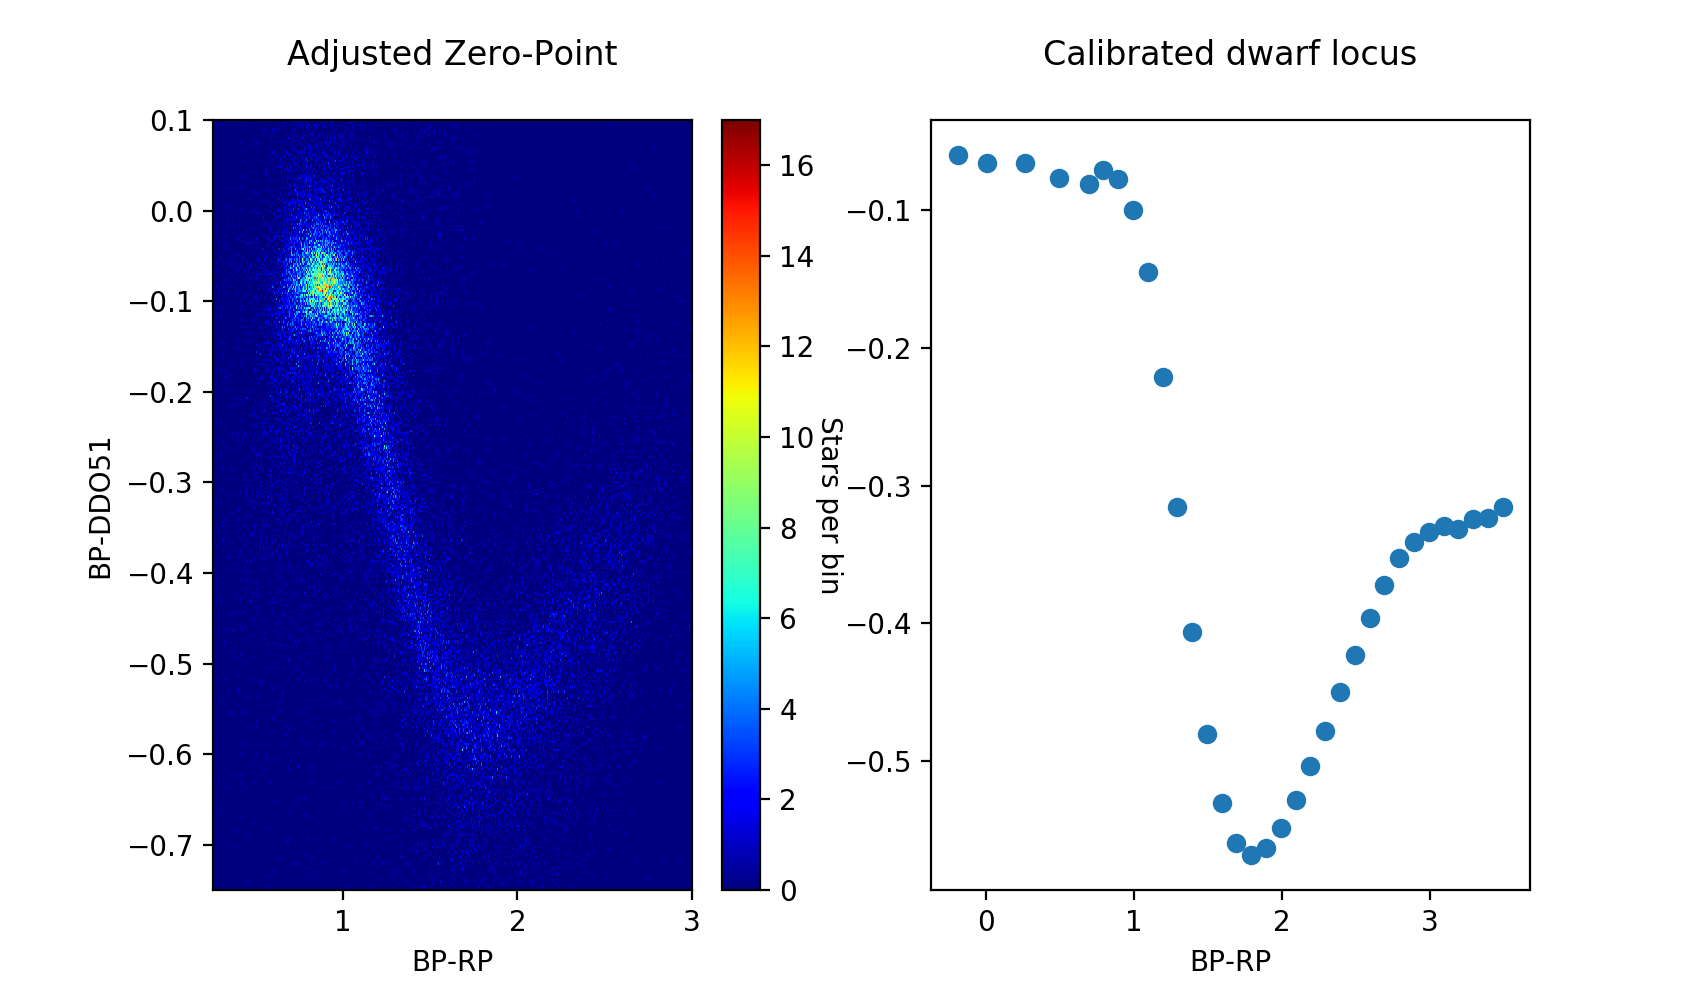

In [82]:
import matplotlib.pyplot as plt
%matplotlib nbagg
from astropy.table import Table
import numpy as np

#Load expected locus data
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

#Calculate differences between photometric bands
bprp = test['GAIA_BP']-test['GAIA_RP']
bpd = test['GAIA_BP']-test['DDO51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot = np.zeros(len(test), dtype=dt)
phot['bprp'] = bprp
phot['bpd'] = bpd

#Focus on the locus
good = np.where(phot['bpd']<3)
phot = phot[good]

x = phot['bprp']
y = phot['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3)
plt.ylim(1.75-2.5,2.6-2.5)
plt.title('Adjusted Zero-Point', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Calibrated dwarf locus', y=1.05)

plt.show()

<a id='qualitycuts'></a>

>###  Success!  The function also runs MUCH more quickly since it has been vectorized.
>
>### These are the quality cuts that David recommended (verbatim):
>#### &emsp;  pid > 0                                             # DDO51 detection
>#### &emsp;  (0 < px < 2048) & (0 < py < 4091)  # DDO51 detection *inside* the CCD range
>#### &emsp; (SFLAGS & (1 | 4 | 8 | 16)) == 0      # Source Extractor flags
>#### &emsp; (DDO51 > 1) & (DDO51<50)      # has good DDO51 PSF photometry
>#### &emsp; DDO51ERR<0.3                     # require okay errors
>#### &emsp; GAIA_MATCH==1                                   # require a Gaia DR2 match
>#### &emsp;star/galaxy cuts
>#### &emsp; (chi < 3) & (abs(sharp)<1)               # DAOPHOT quality and star/galaxy cuts
>#### &emsp; the Gaia DR2 astrometric_excess_noise cut from the email that I sent


In [6]:
g12 = calibr(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn\g12d111_xmatch_all.fits.gz')

In [7]:
# Import modules
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

print("Data points after cuts: {0}".format(len(g12)))

#Quality cuts
ind = np.where((g12['PID']>0)&                           # DDO51 detection
               (g12['PX']>0)&(g12['PX']<2048)&            # DDO51 detection inside the CCD range
               (g12['PY']>0)&(g12['PY']<4091)&
               (g12['SFLAGS']==0)&                       # Source Extractor flags
               (g12['DDO51']<50)&(g12['DDO51']>1)&       # Has good DDO51 PSF photometry
               (g12['DDO51ERR']<0.3)&                    # Require okay errors
               (g12['GAIA_MATCH']==1)&                   # Require a Gaia DR2 match
               (g12['CHI']<3)&(abs(g12['SHARP'])<1))     # DAOPHOT quality and star/galaxy cuts

g12 = g12[ind]    
    
print("Data points after cuts: {0}".format(len(g12)))

Data points after cuts: 258105
Data points after cuts: 71431


<a id='excessnoiseg'></a>

>### To make the cuts in David's email, I am first going to create a color-color plot.  This will help me visualize the cuts I'm making.  Here again is the plot David sent me and the desired cuts:
#### astrometric_excess_noise < 10^0.5 for G <= 19
##### astrometric_excess_noise < 10^(0.5 + 1.25/4*(G-19)) for G >= 19

<img src="files/aenstargal.png">

<IPython.core.display.Javascript object>


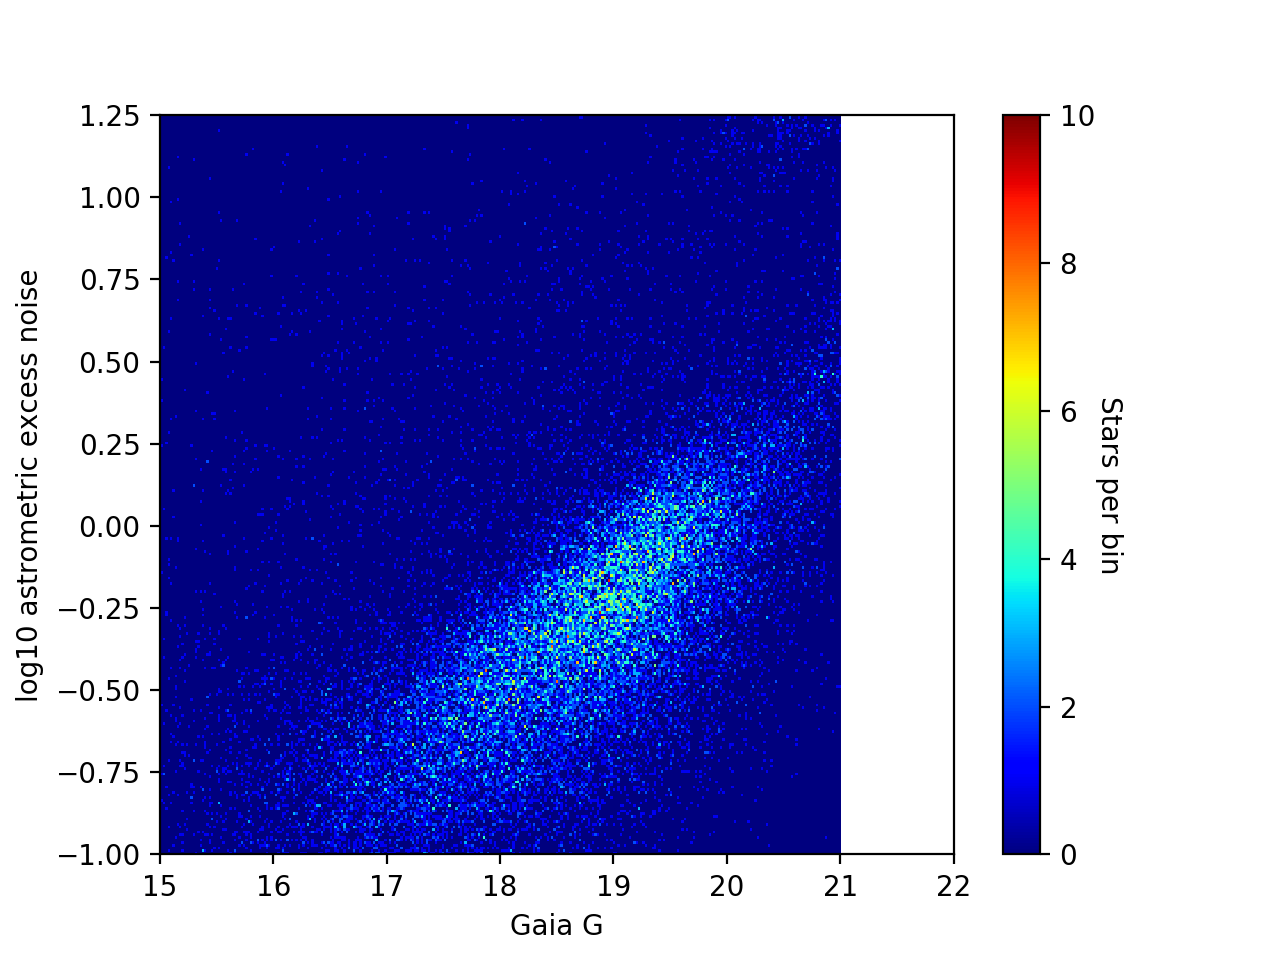

In [9]:
import matplotlib.pyplot as plt
%matplotlib nbagg

# Remove all singular points from y before taking log10
x = g12['GAIA_GMAG']
y = g12['GAIA_ASTROMETRIC_EXCESS_NOISE']
ind = np.where(y!=0)

x = x[ind]
y = y[ind]
#zevec = [0.00000001]*len(y)     #Keeps np.log10 from giving -inf
#y += zevec
y = np.log10(y)

plt.hist2d(x, y, (500, 500), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('Gaia G')
plt.ylabel('log10 astrometric excess noise')
plt.xlim(15,22)
plt.ylim(-1,1.25)
#plt.title('Adjusted Zero-Point', y=1.05)

plt.show()

In [13]:
#Making the cuts
x = g12['GAIA_GMAG']
y = g12['GAIA_ASTROMETRIC_EXCESS_NOISE']
ind = np.where(y!=0)
g12 = g12[ind]
x = x[ind]
y = y[ind]
y = np.log10(y)

ind = np.where((y<0.5)&(x<=19)|(x>19))                           # 
x = x[ind]
y = y[ind]
g12 = g12[ind]              
               
ind = np.where((y<(0.5 + 1.25/4*(x-19)))&(x>=19)|(x<19))       #
g12 = g12[ind]

<IPython.core.display.Javascript object>


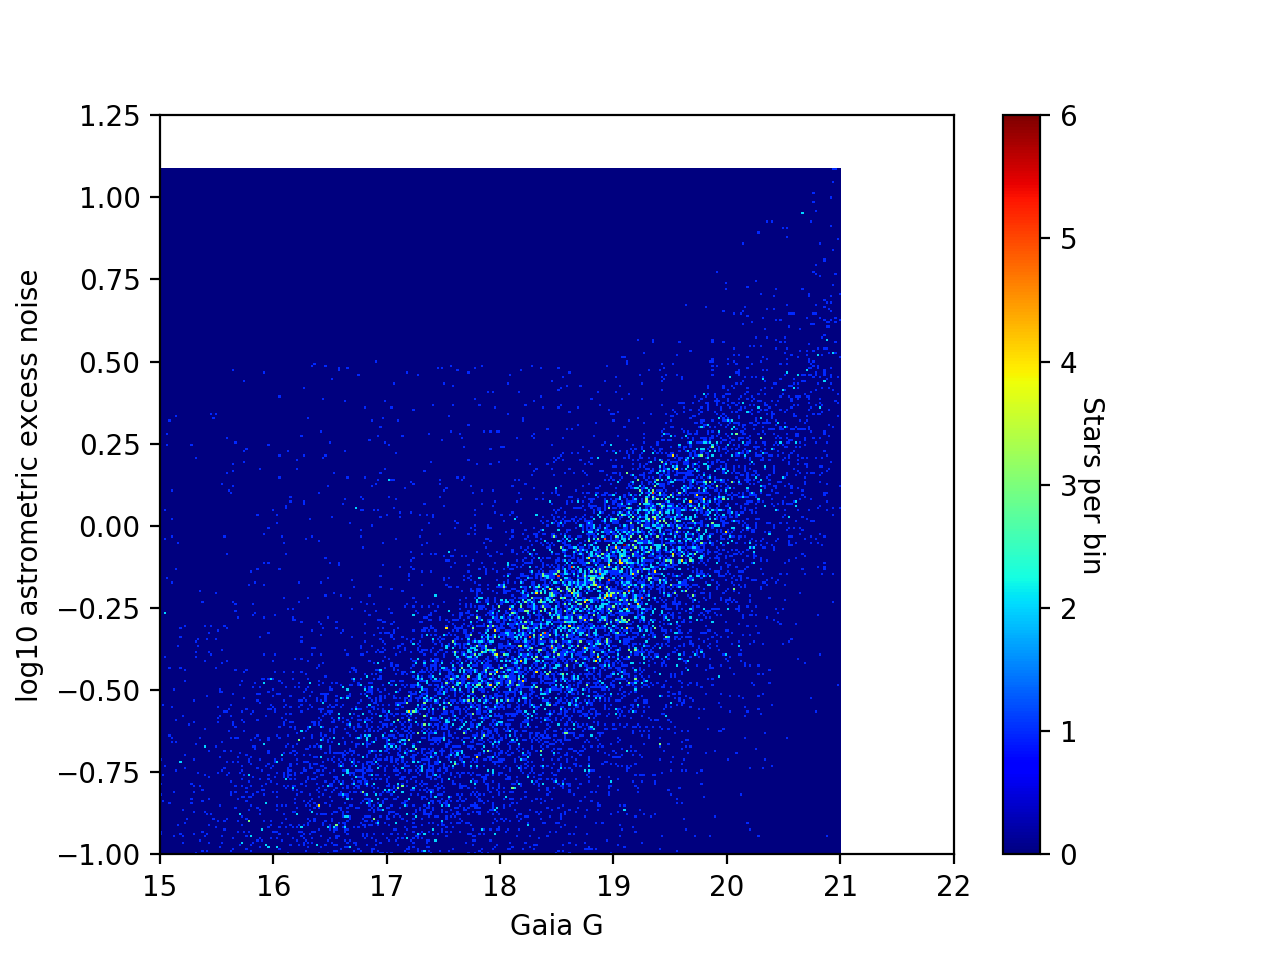

Number of stars after cuts: 12937


In [18]:
import matplotlib.pyplot as plt
%matplotlib nbagg

# Remove all singular points from y before taking log10
x = g12['GAIA_GMAG']
y = g12['GAIA_ASTROMETRIC_EXCESS_NOISE']

ind = np.where(y!=0)

x = x[ind]
y = y[ind]
y = np.log10(y)

plt.hist2d(x, y, (500, 500), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('Gaia G')
plt.ylabel('log10 astrometric excess noise')
plt.xlim(15,22)
plt.ylim(-1,1.25)
#plt.title('Adjusted Zero-Point', y=1.05)

plt.show()
print("Number of stars after cuts: {0}".format(len(g12)))

>### The g12 fits catalog has had all the quality cuts made.